In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
df = pd.read_csv('encoded_df.csv')

In [3]:
df.shape

(781, 20)

In [4]:
df = df.drop(df[df.home_results > 2].index)

In [5]:
print(df['home_results'].value_counts())

0    493
1    276
Name: home_results, dtype: int64


In [6]:
df.shape

(769, 20)

In [7]:
df = df.drop(columns=['Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 
                      'losers', 'win_rank', 'lose_rank', 'hours', 
                      'null', 'half', 'quart', 'three_quart'])

In [8]:
X = df.drop(columns=['home_results'])
y = df['home_results']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=0)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [ ]:
len()

In [11]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [16]:
df.cov()

,Wk,home_rank,away_rank,home_team_code,away_team_code,home_results,day_code
Wk,13.400398,3.162877,-14.257045,-0.057395,2.980653,0.318582,-0.165324
home_rank,3.162877,1206.668458,159.339886,-115.303233,-63.077031,2.897511,-2.279325
away_rank,-14.257045,159.339886,945.087631,-49.556404,-116.543487,-3.042256,-1.725076
home_team_code,-0.057395,-115.303233,-49.556404,1486.982882,-30.654990,-1.050038,0.863164
away_team_code,2.980653,-63.077031,-116.543487,-30.654990,4186.770674,1.513784,1.111227
home_results,0.318582,2.897511,-3.042256,-1.050038,1.513784,0.230393,-0.016174
day_code,-0.165324,-2.279325,-1.725076,0.863164,1.111227,-0.016174,0.487196


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [55]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X)  # fit does nothing.
normalizer_x = transformer.transform(X)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

In [56]:
X_train_norm

array([[0.0337467 , 0.37121375, 0.37121375, 0.39371155, 0.7536764 ,
        0.01499854],
       [0.0302737 , 0.1210948 , 0.20182467, 0.31282824, 0.91830225,
        0.05045617],
       [0.02186452, 0.00874581, 0.43291747, 0.00874581, 0.90081817,
        0.02186452],
       ...,
       [0.04560705, 0.41046342, 0.41046342, 0.01243829, 0.81263466,
        0.02073048],
       [0.04515374, 0.44702208, 0.44702208, 0.29801472, 0.71342917,
        0.02257687],
       [0.05006262, 0.41301659, 0.41301659, 0.50896994, 0.6299546 ,
        0.02085942]])

In [102]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
quantile_x = qt.fit_transform(X)
quantile_xtrain = qt.fit_transform(X_train)
quantile_xtest = qt.fit_transform(X_test)

In [29]:
quantile_x

array([[0.        , 1.        , 1.        , 0.24806202, 0.16666667,
        0.55555556],
       [0.        , 1.        , 1.        , 0.26356589, 0.21794872,
        0.55555556],
       [0.        , 1.        , 1.        , 0.3255814 , 0.99555556,
        0.55555556],
       ...,
       [1.        , 0.1124183 , 1.        , 0.95      , 0.1965812 ,
        0.55555556],
       [1.        , 1.        , 1.        , 0.04166667, 0.95111111,
        0.55555556],
       [1.        , 1.        , 1.        , 0.54074074, 0.98666667,
        0.55555556]])

In [96]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X)
pt.lambdas_
transform_x = pt.transform(X)
transform_xtrain = pt.transform(X_train)
transform_xtest = pt.transform(X_test)

In [31]:
transform_x

array([[-1.9985626 ,  0.50234953,  0.41932668, -0.79972816, -1.16848421,
         0.26835758],
       [-1.9985626 ,  0.50234953,  0.41932668, -0.74048982, -0.94054286,
         0.26835758],
       [-1.9985626 ,  0.50234953,  0.41932668, -0.51260556,  1.55687177,
         0.26835758],
       ...,
       [ 1.47123503, -1.98781078,  0.41932668,  1.4085153 , -1.03345791,
         0.26835758],
       [ 1.47123503,  0.50234953,  0.41932668, -1.77355907,  1.43487049,
         0.26835758],
       [ 1.47123503,  0.50234953,  0.41932668,  0.22835256,  1.53259257,
         0.26835758]])

In [90]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
robust_x = transformer.transform(X)
robust_xtrain = transformer.transform(X_train)
robust_xtest = transformer.transform(X_test)

In [33]:
robust_x

array([[-1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.07462687e-01, -6.72727273e-01,  0.00000000e+00],
       [-1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.77611940e-01, -5.63636364e-01,  0.00000000e+00],
       [-1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.58208955e-01,  1.02727273e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e+00, -8.40000000e+01,  0.00000000e+00,
         8.80597015e-01, -6.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.10447761e-01,  9.36363636e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.46268657e-02,  1.00909091e+00,  0.00000000e+00]])

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.data_max_
minmax_x = scaler.transform(X)
minmax_xtrain = scaler.transform(X_train)
minmax_xtest = scaler.transform(X_test)

In [35]:
minmax_x

array([[0.        , 1.        , 1.        , 0.24427481, 0.16444444,
        0.83333333],
       [0.        , 1.        , 1.        , 0.25954198, 0.21777778,
        0.83333333],
       [0.        , 1.        , 1.        , 0.32061069, 0.99555556,
        0.83333333],
       ...,
       [1.        , 0.14285714, 1.        , 0.95419847, 0.19555556,
        0.83333333],
       [1.        , 1.        , 1.        , 0.03816794, 0.95111111,
        0.83333333],
       [1.        , 1.        , 1.        , 0.54198473, 0.98666667,
        0.83333333]])

In [78]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X)
maxabs_x = transformer.transform(X)
maxabs_xtrain = transformer.transform(X_train)
maxabs_xtest = transformer.transform(X_test)

In [37]:
maxabs_x

array([[0.07692308, 1.        , 1.        , 0.24427481, 0.16444444,
        0.83333333],
       [0.07692308, 1.        , 1.        , 0.25954198, 0.21777778,
        0.83333333],
       [0.07692308, 1.        , 1.        , 0.32061069, 0.99555556,
        0.83333333],
       ...,
       [1.        , 0.15151515, 1.        , 0.95419847, 0.19555556,
        0.83333333],
       [1.        , 1.        , 1.        , 0.03816794, 0.95111111,
        0.83333333],
       [1.        , 1.        , 1.        , 0.54198473, 0.98666667,
        0.83333333]])

---
Scalers:
    - maxabs_xtrain and maxabs_xtest
    - X_train_norm and X_test_norm
    - quantile_xtrain quantile_xtest
    - transform_xtrain and transform_xtest
    - robust_xtrain and robust_xtest
    - minmax_xtrain and minmax_xtest
    - X_train_ss and X_test_ss 

In [108]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=80)

In [109]:
clf.fit(X_train_norm, y_train)

LogisticRegression(max_iter=80)

In [110]:
predictions = clf.predict(X_test_norm)

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(y_test, predictions)


array([[97,  2],
       [42, 13]])

basic:

    -array([[95,  4],
        - [41, 14]])
        
ss: 
    - array([[95,  4],
       - [41, 14]])
       
normalization:
    - array([[97,  2],
       - [42, 13]])
       
maxabs:
    - array([[95,  4],
       - [42, 13]])
       
minmax:
    - array([[95,  4],
       - [42, 13]])
       
robust: 
    - array([[95,  4],
       - [41, 14]])
       
transformer:
    - array([[95,  4],
       - [43, 12]])
       
quantile:
    - array([[95,  4],
       - [42, 13]])

In [45]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('True Negative(TN)  = ', TN)
print('False Positive(FP) = ', FP)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  14
True Negative(TN)  =  95
False Positive(FP) =  4
False Negative(FN) =  41


In [46]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))


Accuracy of the binary classifier = 0.708


In [51]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=100000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision,Recall
Logistic Regression,0.707792,0.254545,0.777778
Support Vector Machines,0.701299,0.200000,0.846154
Decision Trees,0.597403,0.472727,0.440678
Random Forest,0.610390,0.290909,0.432432
Naive Bayes,0.701299,0.327273,0.666667
K-Nearest Neighbor,0.707792,0.454545,0.625000


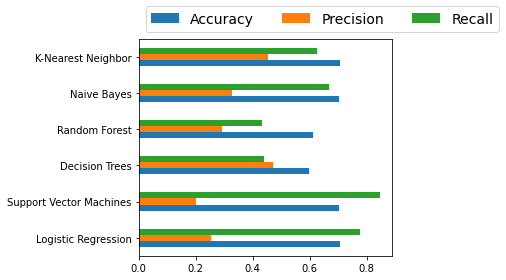

In [54]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()
